# Prédiction des retards des vols

## *Chargement des données*

In [ ]:
pip install nycflights13


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nycflights13: filename=nycflights13-0.0.3-py3-none-any.whl size=8732720 sha256=1c0ed629acbe202f7d58d412078d4debc44a9ca0fad663654f7c2334eec2942a
  Stored in directory: /root/.cache/pip/wheels/64/14/67/ed3bbff6405d6163cfd64d58169cc9284ce9a80c263e759fbe
Successfully built nycflights13


In [ ]:
import pandas as pd
from nycflights13 import flights

# Charger les données
df = flights
df.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [ ]:
# Résumé des données
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
df.shape

(336776, 19)

In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [ ]:
if df["tailnum"].isnull().any():
    df["tailnum"].fillna(df["tailnum"].mode()[0], inplace=True)

In [ ]:
# Utiliser la colonne 'tailnum' comme index
df.set_index('tailnum', inplace=True)

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
tailnum,,,,,,,,,,,,,,,,,,
N14228,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
N24211,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
N619AA,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
N804JB,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
N668DN,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


## Nettoyage des *données*

In [ ]:
if df["dep_time"].isnull().any():
    df["dep_time"].fillna(df["dep_time"].mean(), inplace=True)

In [ ]:
if df["dep_delay"].isnull().any():
    df["dep_delay"].fillna(df["dep_delay"].mean(), inplace=True)

In [ ]:
if df["arr_time"].isnull().any():
    df["arr_time"].fillna(df["arr_time"].mean(), inplace=True)

In [ ]:
if df["arr_delay"].isnull().any():
    df["arr_delay"].fillna(df["arr_delay"].mean(), inplace=True)

In [ ]:
if df["air_time"].isnull().any():
    df["air_time"].fillna(df["air_time"].mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64


## *Encoder les Variables Catégorielles*

In [ ]:
# Encoder les variables catégorielles
df = pd.get_dummies(df, columns=['carrier', 'origin', 'dest'])

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA
tailnum,,,,,,,,,,,,,,,,,,,,,
N14228,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,False,False,False,False,False,False,False,False,False,False
N24211,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,False,False,False,False,False,False,False,False,False,False
N619AA,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,False,False,False,False,False,False,False,False,False,False
N804JB,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,False,False,False,False,False,False,False,False,False,False
N668DN,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convertir les colonnes booléennes (False/True) en 0/1
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_SYR,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA
tailnum,,,,,,,,,,,,,,,,,,,,,
N14228,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,0,0,0,0,0,0,0,0,0,0
N24211,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,0,0,0,0,0,0,0,0,0,0
N619AA,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,0,0,0,0,0,0,0,0,0,0
N804JB,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,0,0,0,0,0,0,0,0,0,0
N668DN,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,0,0,0,0,0,0,0,0,0,0


## *Traitement des colonnes de type datetime*

In [ ]:
# Identification des colonnes de type date/heure
datetime_columns = df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').notna().any()

# Afficher les colonnes identifiées comme date/heure
print(datetime_columns[datetime_columns].index.tolist())


['time_hour']


In [ ]:
# Conversion des colonnes date/heure en composantes numériques
for col in datetime_columns[datetime_columns].index:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df = df.drop(columns=[col])  # Supprimer la colonne originale

# Vérifier les premières lignes pour confirmer les transformations



<ipython-input-20-eddff8964e05>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_year'] = df[col].dt.year
<ipython-input-20-eddff8964e05>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_month'] = df[col].dt.month
<ipython-input-20-eddff8964e05>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,...,dest_TPA,dest_TUL,dest_TVC,dest_TYS,dest_XNA,time_hour_year,time_hour_month,time_hour_day,time_hour_hour,time_hour_minute
tailnum,,,,,,,,,,,,,,,,,,,,,
N14228,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,...,0,0,0,0,0,2013,1,1,10,0
N24211,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,...,0,0,0,0,0,2013,1,1,10,0
N619AA,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,...,0,0,0,0,0,2013,1,1,10,0
N804JB,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,...,0,0,0,0,0,2013,1,1,10,0
N668DN,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,...,0,0,0,0,0,2013,1,1,11,0


## *Séparer les données*

In [ ]:
from sklearn.model_selection import train_test_split

# Définir les caractéristiques (features) et la cible (target)
X = df.drop('arr_delay', axis=1)
y = df['arr_delay'] > 0  # 1 si retard, 0 sinon

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'flight', 'air_time',
       ...
       'dest_TPA', 'dest_TUL', 'dest_TVC', 'dest_TYS', 'dest_XNA',
       'time_hour_year', 'time_hour_month', 'time_hour_day', 'time_hour_hour',
       'time_hour_minute'],
      dtype='object', length=142)

In [ ]:
y.head()

tailnum
N14228     True
N24211     True
N619AA     True
N804JB    False
N668DN    False
Name: arr_delay, dtype: bool

In [ ]:
# Vérifier la répartition des données dans y_train
(y_train.value_counts(normalize=True).sort_index())*100

arr_delay
False    57.694677
True     42.305323
Name: proportion, dtype: float64

In [ ]:
# Vérifier la répartition des données dans y_test
(y_test.value_counts(normalize=True).sort_index())*100

arr_delay
False    57.75432
True     42.24568
Name: proportion, dtype: float64

## *Initialisation et entraînement du modèle de régression logistique*

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=200)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
# Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test)

## *Evaluation du modèle*

In [ ]:
from sklearn.metrics import classification_report
# Évaluation du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.80      0.93      0.86     38901
        True       0.88      0.68      0.77     28455

    accuracy                           0.83     67356
   macro avg       0.84      0.81      0.81     67356
weighted avg       0.83      0.83      0.82     67356



## *La matrice de confusion*

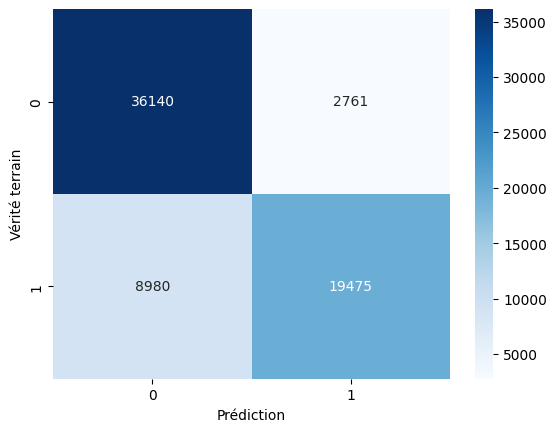

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()

# Sauvgarder le modèle

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Définir les colonnes du modèle
model_columns = list(X_train.columns)
model_columns

['year',
 'month',
 'day',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'flight',
 'air_time',
 'distance',
 'hour',
 'minute',
 'carrier_9E',
 'carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_FL',
 'carrier_HA',
 'carrier_MQ',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'carrier_YV',
 'origin_EWR',
 'origin_JFK',
 'origin_LGA',
 'dest_ABQ',
 'dest_ACK',
 'dest_ALB',
 'dest_ANC',
 'dest_ATL',
 'dest_AUS',
 'dest_AVL',
 'dest_BDL',
 'dest_BGR',
 'dest_BHM',
 'dest_BNA',
 'dest_BOS',
 'dest_BQN',
 'dest_BTV',
 'dest_BUF',
 'dest_BUR',
 'dest_BWI',
 'dest_BZN',
 'dest_CAE',
 'dest_CAK',
 'dest_CHO',
 'dest_CHS',
 'dest_CLE',
 'dest_CLT',
 'dest_CMH',
 'dest_CRW',
 'dest_CVG',
 'dest_DAY',
 'dest_DCA',
 'dest_DEN',
 'dest_DFW',
 'dest_DSM',
 'dest_DTW',
 'dest_EGE',
 'dest_EYW',
 'dest_FLL',
 'dest_GRR',
 'dest_GSO',
 'dest_GSP',
 'dest_HDN',
 'dest_HNL',
 'dest_HOU',
 'dest_

In [ ]:
import pandas as pd
import joblib

# Exemple de nouvelles données d'entrée
data = {
    'year': [2023],
    'month': [7],
    'day': [27],
    'dep_time': [1540],         # Format HHMM
    'sched_dep_time': [1530],   # Format HHMM
    'dep_delay': [10],          # Retard au départ en minutes
    'arr_time': [1800],         # Format HHMM
    'sched_arr_time': [1750],   # Format HHMM
    'carrier': ['AA'],          # Code de la compagnie aérienne
    'flight': [100],            # Numéro de vol
    'tailnum': ['N12345'],      # Numéro de série de l'avion
    'origin': ['JFK'],          # Aéroport d'origine
    'dest': ['LAX'],            # Aéroport de destination
    'air_time': [360],          # Temps de vol en minutes
    'distance': [2475],         # Distance en miles
    'hour': [15],               # Heure de départ prévue
    'minute': [40],             # Minute de départ prévue
    'time_hour': ['2023-07-27'] # Date du départ prévu
}

# Convertir en DataFrame
input_df = pd.DataFrame(data)

# Assigner 'tailnum' comme index
input_df.set_index('tailnum', inplace=True)

# Fonction de prétraitement des nouvelles données
def preprocess_input_data(input_df):
    # Encoder les variables catégorielles
    input_df = pd.get_dummies(input_df, columns=['carrier', 'origin', 'dest'])

    # Convertir les colonnes booléennes (False/True) en 0/1
    bool_columns = input_df.select_dtypes(include=['bool']).columns
    input_df[bool_columns] = input_df[bool_columns].astype(int)

    # Identification des colonnes de type date/heure
    datetime_columns = input_df.select_dtypes(include=['object']).apply(pd.to_datetime, errors='coerce').notna().any()

    # Conversion des colonnes date/heure en composantes numériques
    for col in datetime_columns[datetime_columns].index:
        input_df[col] = pd.to_datetime(input_df[col], errors='coerce')
        input_df[col + '_year'] = input_df[col].dt.year
        input_df[col + '_month'] = input_df[col].dt.month
        input_df[col + '_day'] = input_df[col].dt.day
        input_df[col + '_hour'] = input_df[col].dt.hour
        input_df[col + '_minute'] = input_df[col].dt.minute
        input_df = input_df.drop(columns=[col])  # Supprimer la colonne originale

    return input_df

# Prétraiter les nouvelles données
input_df = preprocess_input_data(input_df)

# Charger le modèle
model = joblib.load('model.pkl')

# Aligner les colonnes de l'entrée avec celles utilisées lors de l'entraînement
all_columns = model.feature_names_in_
for col in all_columns:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[all_columns]

# Faire des prédictions
y_pred = model.predict(input_df)

# Afficher les prédictions
print('Predictions:', y_pred)


Predictions: [ True]


<ipython-input-33-291a9b2429d0>:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-33-291a9b2429d0>:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-33-291a9b2429d0>:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<